<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

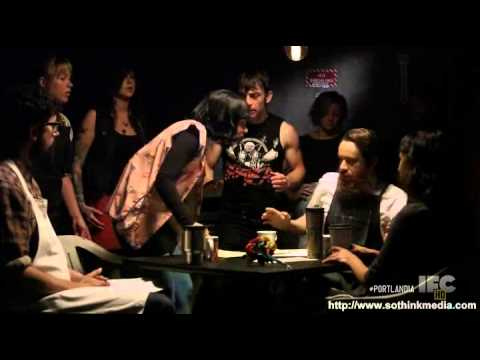

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [89]:
%pwd

'C:\\Users\\lomopa\\Desktop\\DataScience\\Unit4\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [90]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
print(shops.shape)
shops.head()

(7616, 3)


,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [91]:
# Data cleaning
# Collecting numeric values from column
# and then assigning just the collected values to columns
shops['star_rating'] = shops['star_rating'].str[:4]
shops['star_rating'] = shops['star_rating'].astype(float)
shops.head(4)

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0


In [92]:
# shops['full_review_text'] = shops['full_review_text'].str[9:]
# shops['full_review_text'] = shops['full_review_text'].astype(str)
shops['full_review_text'] = shops['full_review_text'].str.strip()
shops.head()
# was not able to find a way to take space and date out of the 
# the full_review_text column. However will skip those elements during the 
# get_lemmas defining

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atmo...,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambian...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots I...,4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice s...,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within t...,4.0


In [93]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7616 entries, 0 to 7615
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   coffee_shop_name  7616 non-null   object 
 1   full_review_text  7616 non-null   object 
 2   star_rating       7616 non-null   float64
dtypes: float64(1), object(2)
memory usage: 178.6+ KB


In [94]:
# Base imports and modules 
from collections import Counter

import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

In [108]:
# Define all of our functions in this cell for readability

def count(docs):
    word_counts = Counter()
    appears_in = Counter()
    
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(temp, columns = ['word', 'count'])
    wc['rank'] = wc['count'].rank(method='first', ascending = False)
    total = wc['count'].sum()
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
    
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    return wc.sort_values(by='rank')

In [96]:
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

def get_lemmas(text):
    lemmas = []
    # these are repeated words
    STOP_WORDS = nlp.Defaults.stop_words.union(['check', 'coffee', 'place', 'love'])
    
    doc = nlp(text)
    
    # Ignore the first 2 elements containing blank space and date
    for token in doc[2:]:
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos != 'PRON') \
                and (token.is_space == False) and (token.is_digit == False) and (token.text.lower() not in STOP_WORDS):
                      lemmas.append(token.lemma_.lower())
    return lemmas
    
    

In [97]:
# running the get_lemmas def and applying it to dataset
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [98]:
shops['lemmas'][0]

['love',
 'atmosphere',
 'corner',
 'shop',
 'style',
 'swing',
 'order',
 'matcha',
 'latte',
 'muy',
 'fantastico',
 'order',
 'get',
 'drink',
 'pretty',
 'streamlined',
 'order',
 'ipad',
 'include',
 'beverage',
 'selection',
 'range',
 'wine',
 'desire',
 'level',
 'sweetness',
 'checkout',
 'system',
 'get',
 'latte',
 'minute',
 'hope',
 'typical',
 'heart',
 'feather',
 'latte',
 'find',
 'list',
 'possibility',
 'art',
 'idea']

In [99]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,lemmas
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atmo...,5.0,"[love, atmosphere, corner, shop, style, swing,..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambian...",4.0,"[date, night, austin, ambiance, austin, beauti..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots I...,4.0,"[list, brunch, spots, love, eclectic, homey, p..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice s...,2.0,"[cool, decor, good, drink, nice, seating, over..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within t...,4.0,"[locate, northcross, mall, shopping, center, f..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [109]:
# devidng the reviews by good >= 4 & bad <= 3
wc_bad = count(shops[shops['star_rating'] <= 3].lemmas)
wc_good = count(shops[shops['star_rating'] >= 4].lemmas)

In [117]:
print('                               Good Ratings\n')
print(wc_good.head(5))
print("-" * 80)
print('                               Bad Ratings\n')
print(wc_bad.head(5))

                               Good Ratings

       word  appears_in  count  rank  pct_total  cul_pct_total  appears_in_pct
193    good        2865   4256   1.0   0.016468       0.016468        0.466612
68    great        2377   3287   2.0   0.012719       0.029187        0.387134
179    like        1676   2432   3.0   0.009411       0.038598        0.272964
52   austin        1583   2038   4.0   0.007886       0.046484        0.257818
352    come        1460   1957   5.0   0.007573       0.054056        0.237785
--------------------------------------------------------------------------------
                               Bad Ratings

      word  appears_in  count  rank  pct_total  cul_pct_total  appears_in_pct
29    good         635    984   1.0   0.013470       0.013470        0.430217
15    like         594    943   2.0   0.012909       0.026378        0.402439
132  order         427    755   3.0   0.010335       0.036714        0.289295
102   come         450    646   4.0   0.0088

In [118]:
# Merge wc_good and wc_bad
# find the difference in rel freq
combined_wc = pd.merge(wc_good, wc_bad, how='inner', on='word')
combined_wc['diff_cul_pct'] = abs(combined_wc['cul_pct_total_x'] - combined_wc['cul_pct_total_y'])

In [119]:
# Sorting values of the diff_cul_pct column 
combined_wc.sort_values(by=['diff_cul_pct'], ascending=False, inplace=True)

In [121]:
print(combined_wc.shape)
combined_wc.head()

(5118, 14)


,word,appears_in_x,count_x,rank_x,pct_total_x,cul_pct_total_x,appears_in_pct_x,appears_in_y,count_y,rank_y,pct_total_y,cul_pct_total_y,appears_in_pct_y,diff_cul_pct
1640,rude,19,19,1681.0,0.000074,0.863265,0.003094,97,123,107.0,0.001684,0.370010,0.065718,0.493254
131,moon,142,348,132.0,0.001347,0.409962,0.023127,12,13,921.0,0.000178,0.780471,0.008130,0.370510
55,perfect,612,690,56.0,0.002670,0.258875,0.099674,39,42,360.0,0.000575,0.600613,0.026423,0.341739
2213,horrible,11,11,2342.0,0.000043,0.900307,0.001792,43,48,299.0,0.000657,0.563366,0.029133,0.336941
1230,disappointed,29,30,1240.0,0.000116,0.822535,0.004723,66,68,211.0,0.000931,0.496605,0.044715,0.325930


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


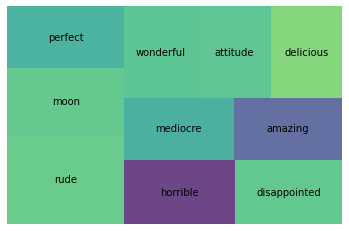

In [122]:
wc_top10 = combined_wc.head(10) # dataframe is already sorted, return top 10 words with largest pct diff

squarify.plot(sizes=wc_top10['diff_cul_pct'], label=wc_top10['word'], alpha=.8)
plt.axis('off')
plt.show()

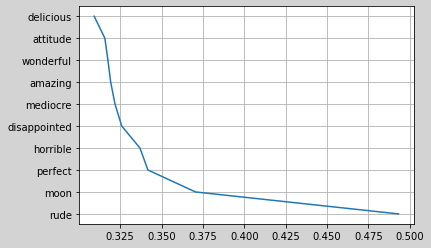

In [129]:
plt.figure(facecolor='lightgray')
plt.grid()
plt.plot(wc_top10['diff_cul_pct'], wc_top10['word']);

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

